In [17]:
import pandas as pd

# Load the Excel file
file_path = "/Users/pshroff/Documents/BU/cs506/ds-ncf-mass-cs-ed/fa23-team-a/data/sat_performance.xlsx"  # Replace with your file path
df = pd.read_excel(file_path)

df['Avg SAT Score'] = df['Reading / Writing'] + df['Math']
density_map_data = df[['District Name', 'Avg SAT Score']]

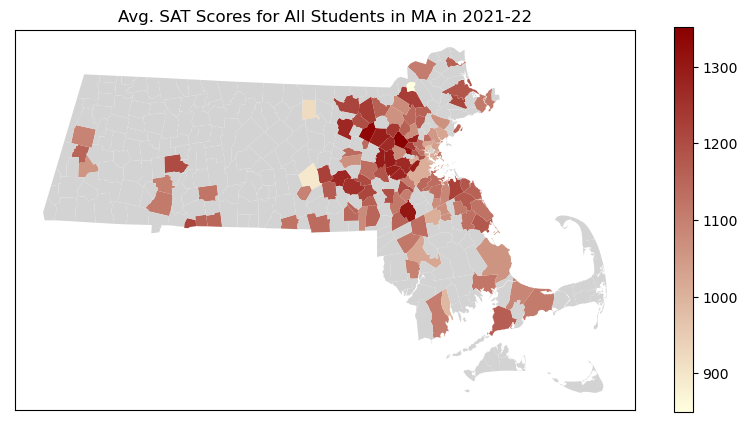

In [22]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
gdf = gpd.read_file('/Users/pshroff/Documents/BU/cs506/ds-ncf-mass-cs-ed/fa23-team-a/data/MA_town_data/TOWNSSURVEY_POLYM_GENCOAST.shp') ## gdf is Geographical Data File

# Merge the GeoDataFrame and the pandas DataFrame on the "TOWN" column
merged = gdf.merge(density_map_data, left_on='TOWN', right_on='District Name', how='left')

# Define a color map for color mapping
cmap = LinearSegmentedColormap.from_list('mycmap', ['lightyellow', 'darkred'])
missing_color = 'lightgray'

# Create a plot with custom styling
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# Plot the GeoDataFrame with color mapping
merged.plot(column='Avg SAT Score', cmap=cmap, ax=ax, legend=True, missing_kwds={'color': missing_color},)

# Remove x and y axis ticks
ax.set_xticks([])
ax.set_yticks([])

# Customize the plot (e.g., add a title)
ax.set_title('Avg. SAT Scores for All Students in MA in 2021-22')

# Show the plot
plt.show()